## 🤔 Why is it called **Logistic Regression** if it's used for **Classification**?
### 🧠 What is **regression**?

In math or science, **regression** usually means:

> Trying to **predict a number** based on other numbers.

**Example:**
> Predicting your **marks** based on how many **hours you studied**.  
More hours → more marks. That’s called **linear regression**.

---

### 👦 But what if we want to predict **YES or NO**?

Like:

- Will you pass the test? ✅ Yes or ❌ No  
- Is an email spam? 📧 Yes or ❌ No

These are **not numbers**. They're **choices** — like **0 or 1**, or **True or False**.

We can't use normal regression, because it gives numbers like 2.6 or -3.9.

---

### 🧪 What does **Logistic Regression** do?

Even though it has **"regression"** in the name, it's actually used for:

> Predicting **YES/NO** (0 or 1) **by turning numbers into probabilities**.

It uses a **magic curve** called the **sigmoid function**.

---

### 🎢 What is the **sigmoid function**?

Imagine a smooth slide:

- If the score is very low → the output is close to 0 (❌ No)
- If the score is very high → the output is close to 1 (✅ Yes)
- If the score is in the middle → the output is around 0.5 (🧐 Maybe)

So we can say:
- If the output is **> 0.5** → predict **YES**
- If it's **< 0.5** → predict **NO**

---

### 🤷 So why is it called **“regression”**?

> Because it **starts like linear regression** — it uses math to draw a line using weights and bias.  
> But then it adds the **logistic (sigmoid)** step to convert it into a **classifier**.

So it **looks like regression**, but it's actually doing **classification**.

---

### 📌 Summary

| Concept               | Simple Meaning                                |
|------------------------|-----------------------------------------------|
| Regression            | Predicting a number                          |
| Classification        | Predicting Yes/No or labels                  |
| Logistic Regression   | A smart way to predict Yes/No using a curve |
| Why the name?         | It uses regression math + a logistic curve   |


## 🎢 What is the Sigmoid Function?

The **sigmoid function** is the heart of logistic regression.  
It takes any real number (even very large or small), and **squashes it between 0 and 1**.

This makes it perfect for:
- Interpreting model output as a **probability**
- Making binary decisions: YES (1) or NO (0)

The sigmoid function formula is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$



Where:
- \( x \) is any number (from -∞ to +∞)
- \( \sigma(x) \) will always be between 0 and 1

Let's visualize the sigmoid curve:


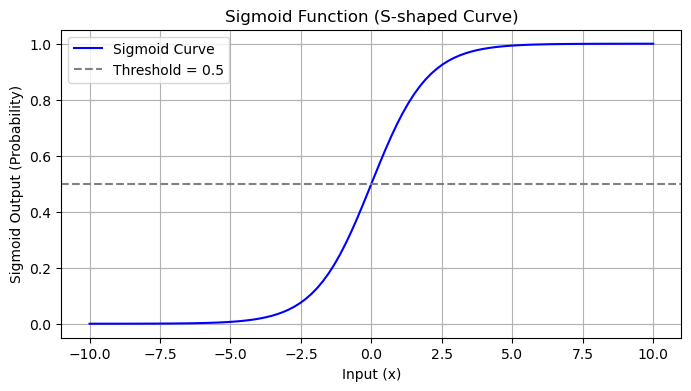

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# X values from -10 to 10
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sigmoid Curve', color='blue')
plt.axhline(0.5, linestyle='--', color='gray', label='Threshold = 0.5')
plt.title("Sigmoid Function (S-shaped Curve)")
plt.xlabel("Input (x)")
plt.ylabel("Sigmoid Output (Probability)")
plt.legend()
plt.grid(True)
plt.show()


# 📊 Can We Convert Continuous Targets into Categories?

Yes! We can convert a **continuous target** (like marks, price, temperature) into **categories** using a process called **discretization** or **binning**.

This lets us use classification models like **Logistic Regression** on problems that originally used regression.

---

## 🎯 Example Problem

Suppose we have students' **marks** (continuous values), and we want to predict their **grade**:

| Marks | Grade (Category) |
|-------|------------------|
| 90–100 | A (Good) |
| 75–89  | B (Average) |
| < 75   | C (Fail) |

So, instead of predicting **exact marks**, we’ll predict **categories**.

---


In [20]:
import pandas as pd
import numpy as np

# Simulated student marks and study hours
np.random.seed(0)
data = pd.DataFrame({
    'study_hours': np.random.uniform(1, 10, 10),
})
# Simulated marks based on hours (with some noise)
data['marks'] = 10 * data['study_hours'] + np.random.normal(0, 5, 10)

data.head()


,study_hours,marks
0,5.939322,60.113433
1,7.436704,81.638411
2,6.424870,68.053892
3,5.903949,59.647862
4,4.812893,50.348248


## Discretization / Binning 
### Step 1: Convert Continuous Marks into Categories (Grades)

We'll define custom bins:

- `Fail`: < 75
- `Average`: 75–90
- `Good`: > 90


In [22]:
# Apply Binning
# Define bins and labels
bins = [0, 75, 90, 1000]
labels = ['Fail', 'Average', 'Good']

# Apply binning to create 'grade' column
data['grade'] = pd.cut(data['marks'], bins=bins, labels=labels)

data.head(10)


,study_hours,marks,grade
0,5.939322,60.113433,Fail
1,7.436704,81.638411,Average
2,6.424870,68.053892,Fail
3,5.903949,59.647862,Fail
4,4.812893,50.348248,Fail
5,6.813047,69.798842,Fail
6,4.938285,56.853244,Fail
7,9.025957,89.233779,Average
8,9.672965,98.294987,Good
9,4.450974,40.239258,Fail


## 🤔 But Should You Always Convert Continuous Targets into Categories?

Converting continuous data into categories (a process called **binning**) can sometimes help, but it isn't always the right choice.

---

### ✔️ When It’s OK:

✅ When **exact values aren’t necessary**, and only the group matters  
&nbsp;&nbsp;&nbsp;&nbsp;_Example: Classifying scores as "High", "Medium", "Low" instead of exact marks._

✅ When the **audience understands categories better**  
&nbsp;&nbsp;&nbsp;&nbsp;_Example: "Pass"/"Fail" or "High Risk"/"Low Risk" instead of detailed numbers._

✅ When you want to **simplify the problem**  
&nbsp;&nbsp;&nbsp;&nbsp;_Classification models are often simpler and easier to interpret._

---

### ❌ When It’s Not Ideal:

🚫 When the **exact value is important**  
&nbsp;&nbsp;&nbsp;&nbsp;_Example: Predicting an exact house price is better than just saying "expensive"._

🚫 When you lose **too much information** by grouping  
&nbsp;&nbsp;&nbsp;&nbsp;_Example: Grouping 70–100 as "Pass" hides who scored 71 vs. 99._

🚫 When the categories are **arbitrary or poorly chosen**  
&nbsp;&nbsp;&nbsp;&nbsp;_Bad binning can lead to bad predictions._

---

### 🧠 Rule of Thumb

> Only convert continuous targets to categories when it's **meaningful for the problem and user** — not just to force a classification model.

---

# 🎯 Do Classification Algorithms Produce Probabilities?

Yes! Many classification algorithms (like **Logistic Regression**, **Random Forest**, **Naive Bayes**, and even **Neural Networks**) can give you **probabilities** for each class.

---

## 🤔 What Does That Mean?

Let’s say we’re predicting whether an email is **Spam (1)** or **Not Spam (0)**.

A classification model might return:

Prediction: Spam
Probability:

Not Spam (0) → 0.30

Spam (1) → 0.70


➡️ This means:  
> “The model is **70% confident** that the email is spam.”

---

## 🧪 Probability vs Final Class

Most models use a **threshold** to convert probabilities into final predictions:

- If probability > 0.5 → Predict class **1**
- If probability < 0.5 → Predict class **0**

> You can **adjust the threshold** based on your use case!

---

## 🧠 Why Is Probability Useful?

### ✅ 1. Confidence Score

You can **measure how sure** the model is about its prediction.

Example:
- 0.99 → Very confident
- 0.51 → Barely confident

---

### ✅ 2. Threshold Tuning

In some cases, you may want to **change the threshold**:

- For **medical diagnosis**, use a lower threshold to **catch more diseases** (even if some are false positives).
- For **fraud detection**, you may want to **raise the threshold** to reduce false alarms.

---

### ✅ 3. Ranking Results

Use probabilities to **sort or rank predictions**.

Example:
- In email apps, show the **most spammy** messages at the top.
- In recommender systems, suggest products with the **highest predicted interest**.

---

### ✅ 4. Multi-class Classification

When there are more than 2 classes (e.g., Dog, Cat, Horse), you get probabilities for **all classes**.

Example:
Dog → 0.10
Cat → 0.75
Horse → 0.15

Final Prediction: Cat (highest probability)

---

## ✅ Summary

| Feature                     | Explanation |
|----------------------------|-------------|
| Probability Output         | Shows model's confidence |
| Threshold (Default = 0.5)  | Used to decide final class |
| Custom Thresholds          | Improve results for specific needs |
| Helpful For                | Ranking, filtering, risk scoring, alerting |

---

👉 So yes — **classification algorithms do produce probabilities**, and they're **super helpful** for making better decisions, not just predictions!
---

---
# 📐 Derivation of the Sigmoid (Logistic) Function

The sigmoid function formula is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## ✅ Goal

We want to find a function that:

- Maps any real number $x \in (-\infty, \infty)$  
- To a value between $(0, 1)$  
- In a **smooth, continuous, and differentiable** way

This is useful for **probabilities** in Logistic Regression and Neural Networks.

---

## 🔍 Step 1: Start with an Exponential Function

We want a function that decays or grows based on the sign of $x$.  
An exponential decay function has the form:

$$
f(x) = e^{-x}
$$

This gets very **large** when $x$ is negative, and very **small** when $x$ is positive.

---

## 🧮 Step 2: Invert and Shift It

Let’s build a function that maps large negative values to numbers **close to 0**  
and large positive values to numbers **close to 1**.

We try:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

---

## 🧪 Step 3: Analyze Behavior

Let’s check limits of this function:

- As $x \to +\infty$:
  $$
  e^{-x} \to 0 \Rightarrow f(x) \to \frac{1}{1 + 0} = 1
  $$

- As $x \to -\infty$:
  $$
  e^{-x} \to \infty \Rightarrow f(x) \to \frac{1}{1 + \infty} = 0
  $$

So:

$$
f(x) \in (0, 1) \quad \text{for all } x
$$

✔️ This is exactly what we need for a **probability output**!

---

## 📈 Final Sigmoid Function

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## 📐 Derivative of Sigmoid

It also has a **beautiful derivative**, which is useful for optimization:

$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

This makes it efficient for use in gradient-based learning (e.g., logistic regression, backpropagation).

---

## ✅ Summary

| Property       | Value                          |
|----------------|-------------------------------|
| Name           | Sigmoid or Logistic Function  |
| Formula        | $\sigma(x) = \frac{1}{1 + e^{-x}}$ |
| Output Range   | $(0, 1)$                   |
| Use Case       | Probability modeling, classification |
| Derivative     | $\sigma(x)(1 - \sigma(x))$ |

---

### Plot Sigmoid and Its Derivative


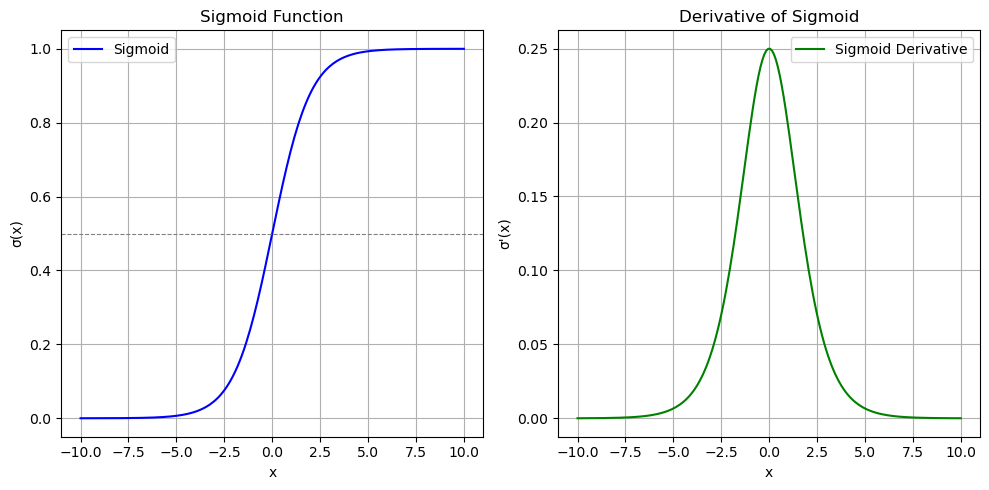

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Input range
x = np.linspace(-10, 10, 200)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# Plot
plt.figure(figsize=(10, 5))

# Sigmoid plot
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Sigmoid', color='blue')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.legend()

# Derivative plot
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Sigmoid Derivative", color='green')
plt.title("Derivative of Sigmoid")
plt.xlabel("x")
plt.ylabel("σ'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 📊 What You’ll See:

- The **left graph** shows how the sigmoid function smoothly transitions from 0 to 1 as \( x \) increases.
- The **right graph** shows the **derivative of the sigmoid function**, which:
  - Peaks at **0.25** when \( x = 0 \)
  - Gradually shrinks toward 0 as $( x \to -\infty )\ or\ ( x \to +\infty )$

This behavior makes the sigmoid useful in modeling probabilities, but it also explains why gradients can vanish for very large or small input values.


# 📚 Family of Logistic Functions

---

## What is the Logistic Function?

The **logistic function** is a type of sigmoid function that maps any real-valued input to a value between 0 and 1:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## The Family: Generalized Logistic Functions

The **family of logistic functions** extends this basic form by adding parameters that control shape, slope, and position:

$$
f(x) = L + \frac{U - L}{\left(1 + e^{-k(x - x_0)}\right)^v}
$$

Where:

| Parameter | Description                          |
|-----------|------------------------------------|
| \(L\)     | Lower asymptote (minimum value)    |
| \(U\)     | Upper asymptote (maximum value)    |
| \(k\)     | Growth rate (steepness of curve)   |
| \(x_0\)   | The \(x\)-value of the sigmoid's midpoint (inflection point) |
| \(v\)     | Affects near which asymptote maximum growth occurs (usually \(v=1\)) |

---

## Special Cases:

- When \( L=0 \), \( U=1 \), \( v=1 \), and \( k=1 \), the function reduces to the **standard logistic function**:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- By adjusting parameters, you can control the **vertical scaling**, **horizontal shift**, and **steepness**.

---

## Applications

The logistic family is widely used in:

- **Biology**: Modeling population growth (limited by carrying capacity)  
- **Machine Learning**: Logistic regression for binary classification  
- **Statistics**: Growth curves and dose-response models  

---

## Intuition:

Think of it like a flexible S-shaped curve that you can stretch, shift, and squeeze to fit different real-world data patterns.

---


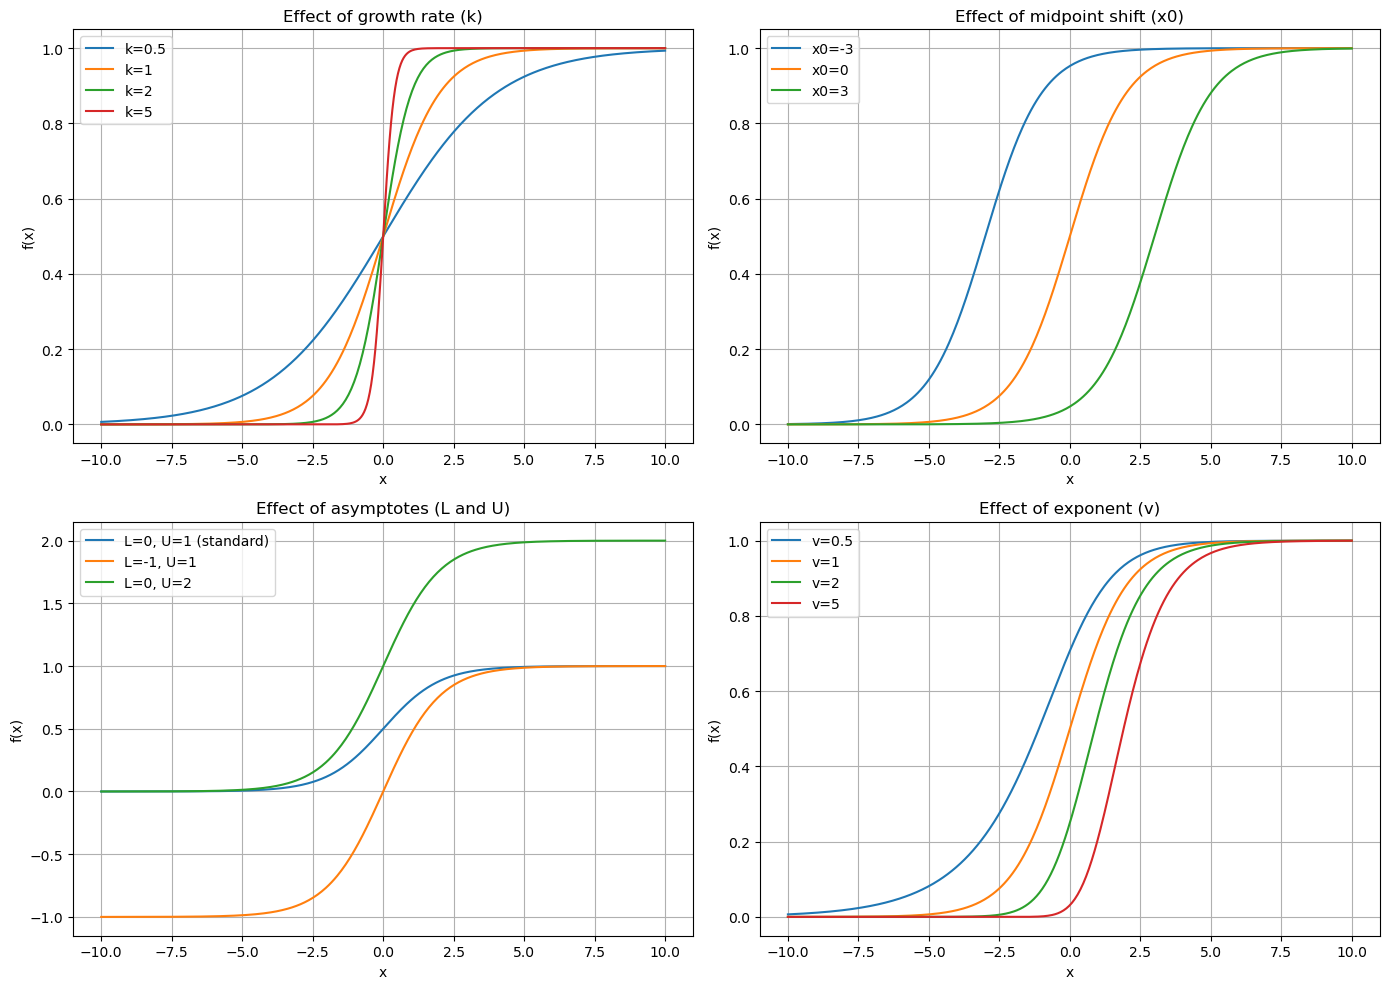

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def generalized_logistic(x, L=0, U=1, k=1, x0=0, v=1):
    return L + (U - L) / ((1 + np.exp(-k * (x - x0))) ** v)

x = np.linspace(-10, 10, 400)

plt.figure(figsize=(14, 10))

# Varying growth rate k
plt.subplot(2, 2, 1)
for k in [0.5, 1, 2, 5]:
    plt.plot(x, generalized_logistic(x, k=k), label=f'k={k}')
plt.title('Effect of growth rate (k)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Varying midpoint x0
plt.subplot(2, 2, 2)
for x0 in [-3, 0, 3]:
    plt.plot(x, generalized_logistic(x, x0=x0), label=f'x0={x0}')
plt.title('Effect of midpoint shift (x0)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Varying lower (L) and upper (U) asymptotes
plt.subplot(2, 2, 3)
plt.plot(x, generalized_logistic(x, L=0, U=1), label='L=0, U=1 (standard)')
plt.plot(x, generalized_logistic(x, L=-1, U=1), label='L=-1, U=1')
plt.plot(x, generalized_logistic(x, L=0, U=2), label='L=0, U=2')
plt.title('Effect of asymptotes (L and U)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Varying exponent v
plt.subplot(2, 2, 4)
for v in [0.5, 1, 2, 5]:
    plt.plot(x, generalized_logistic(x, v=v), label=f'v={v}')
plt.title('Effect of exponent (v)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### What you’ll observe:

- **Top-left:** Changing $(\ k\ )$ adjusts how steep the curve is.
- **Top-right:** Changing $(\ x_0\ )$ shifts the curve left or right.
- **Bottom-left:** Changing $(\ L\ )$ and \( U \) sets the minimum and maximum output values.
- **Bottom-right:** Changing $(\ v\ )$ changes the curve’s shape near asymptotes, making it more gradual or abrupt.


# 🔥 Family of Logistic Functions Based on Hyperbolic Tangent (tanh)

---

## What is the Hyperbolic Tangent Function?

The **hyperbolic tangent** function is defined as:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

It maps any real number \(x\) to the range \((-1, 1)\).

---

## Relationship to the Logistic (Sigmoid) Function

The tanh function can be expressed using the logistic function \(\sigma(x)\):

$$
\tanh(x) = 2 \sigma(2x) - 1
$$

where

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

## Generalized Hyperbolic Tangent (Tanh) Family

Similar to the generalized logistic function, the tanh family introduces parameters to control shape and scaling:

$$
f(x) = L + \frac{U - L}{2} \left( 1 + \tanh(k (x - x_0)) \right)
$$

Where:

| Parameter | Description                          |
|-----------|------------------------------------|
| \(L\)     | Lower asymptote (minimum value)    |
| \(U\)     | Upper asymptote (maximum value)    |
| $(k)$     | Growth rate (steepness of curve)   |
| $(x_0)$   | Midpoint (inflection point)        |

---

## Properties:

- Output range is $([L, U])$ (by default often $([-1, 1])$ if $(L=-1)\ and\ (U=1))$
- Steeper transitions with higher $(k)$
- Symmetric about the midpoint $(x_0)$

---

## Applications:

- **Neural networks:** Tanh is often used as an activation function due to zero-centered output.
- **Signal processing:** Smooth squashing functions for signals.
- **Modeling:** When outputs centered around zero are desired.

---

## Summary:

| Function | Output Range | Formula Example                          |
|----------|--------------|----------------------------------------|
| Logistic (Sigmoid) | (0, 1)        | $\ ( \sigma(x) = \frac{1}{1 + e^{-x}}) $     |
| Hyperbolic Tangent (Tanh) | (-1, 1)       | $\ ( \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}})$ |

---


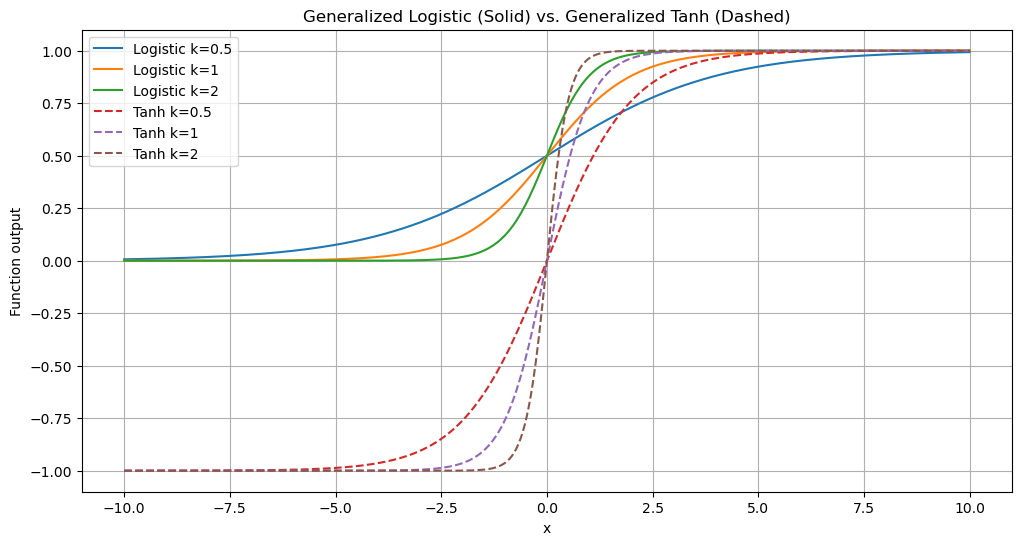

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def generalized_logistic(x, L=0, U=1, k=1, x0=0):
    return L + (U - L) / (1 + np.exp(-k * (x - x0)))

def generalized_tanh(x, L=-1, U=1, k=1, x0=0):
    return L + (U - L) / 2 * (1 + np.tanh(k * (x - x0)))

x = np.linspace(-10, 10, 400)

plt.figure(figsize=(12, 6))

# Plot generalized logistic with different growth rates k
for k in [0.5, 1, 2]:
    plt.plot(x, generalized_logistic(x, k=k), label=f'Logistic k={k}')
    
# Plot generalized tanh with different growth rates k
for k in [0.5, 1, 2]:
    plt.plot(x, generalized_tanh(x, k=k), linestyle='--', label=f'Tanh k={k}')

plt.title("Generalized Logistic (Solid) vs. Generalized Tanh (Dashed)")
plt.xlabel("x")
plt.ylabel("Function output")
plt.grid(True)
plt.legend()
plt.show()


### What You’ll See:
- Solid lines show the logistic family curves (range from 0 to 1).
- Dashed lines show the tanh family curves (range from -1 to 1).
- Increasing \( k \) makes both functions steeper around their midpoint.
